<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
3-D Computer Vision (Fall 2023)
        </font>
		<p></p>
        <h1 style="text-align: center">
       HW1 - Practical part
        </h1>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	Question 1
        </font>
		<p></p>
		<hr>
       A- Consider the following matrix, apply a 2D DFT on it using the available libraries and move it to the frequency space and print the result.
	   <br>
	</font>
</div>

In [1]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


# TODO

dft_matrix = np.fft.fft2(matrix)

print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)



Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


<div style="direction:ltr;line-height:300%;">
	<font face="XB Zar" size=5>
B- Write the Fourier transform function without using ready-made libraries and move the 1.jpg image to the Fourier space and print the result.</font> 
</div>

<div style="direction:ltr;line-height:300%;">
	<font face="XB Zar" size=4>
        Here, to implement the DFT function, implement it in such a way that by using the kernel matrix, it applies the Fourier transform once for each column and once for each row. Performed the DFT transformation.
</font> 
</div>

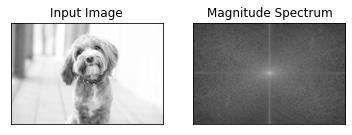

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('1.jpg', 0)

# TODO
def DFT_1D(arr):
    N = len(arr)
    coeff = np.pi * np.arange(N) * np.arange(N).reshape(N, 1)
    coeff = np.exp(-2 * 1j * coeff/N)
    return np.dot(coeff, arr)

def DFT_2D(img):
    im1 = np.apply_along_axis(DFT_1D, 0, img)
    im2 = np.apply_along_axis(DFT_1D, 1, im1)
    return im2


dft_img = DFT_2D(img)
dft_img = np.fft.fftshift(dft_img)
magnitude_spectrum = np.log1p(np.abs(dft_img))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	Question 2
        </font>
		<p></p>
		<hr>
       Implement the image smoothing spatial filters including Gaussian Blur, Average Pooling and Low pass filter yourself and apply them to the image 2.png.
	   <br>
	</font>
</div>

<div style="direction:ltr;line-height:300%;">
	<font face="XB Zar" size=4>
        Here, a function is implemented for each conversion. For the low-pass filter, the Fourier transformation is used to transform the photo in the frequency space and in a low-pass filter, which we create as a white circle with a radius of 80 pixels in the center of the black photo, and multiply it by the Fourier transformation of the photo. We return it to the filtered image by inverse transformation.
 A convolution function has also been created for the Gaussian filter, and in the GaussianBlurImage function, we first obtain the Gaussian filter by defining the standard deviation and convolution in the image.
 For average pooling, firstly, we get the pool or parts of the photo, and then we simply get the average of each of them and form a new photo.
    </font> 
</div>

In [3]:
def low_pass_img(img):
    fft = np.fft.fftshift(np.fft.fft2(img))

    x,y = img.shape[0], img.shape[1]
    l_x, l_y= 80, 80

    bbox = ((x/2)-(l_x/2), (y/2)-(l_y/2), (x/2)+(l_x/2), (y/2)+(l_y/2))

    low_pass = Image.new("L", (img.shape[0], img.shape[1]), color=0)

    draw1 = ImageDraw.Draw(low_pass)
    draw1.ellipse(bbox, fill=1)

    low_pass_np = np.array(low_pass)

    filtered = np.multiply(fft,low_pass_np.T)

    final = np.fft.ifft2(np.fft.ifftshift(filtered)).real
    final = np.maximum(0, np.minimum(final, 255))
    
    return final

In [4]:
def convolution(oldimage, kernel):
    
    image_h, image_w = oldimage.shape
    
    kernel_h, kernel_w = kernel.shape
        
    image_pad = np.pad(oldimage, pad_width=(
        (kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
        kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            image_conv[i][j] = (x.flatten()*kernel.flatten()).sum()
        
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]


def GaussianBlurImage(image, sigma):
    # define gaussian filter
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
        
    # convolution
    im_filtered = np.zeros_like(image, dtype=np.float32)
    im_filtered[:, :] = convolution(image[:, :], gaussian_filter)
    return (im_filtered.astype(np.uint8))

In [5]:
def get_pools(img, pool_size, stride):
    pools = []
    
    for i in np.arange(img.shape[0], step=stride):
        for j in np.arange(img.shape[1], step=stride):
            
            mat = img[i:i+pool_size, j:j+pool_size]
            
            if mat.shape == (pool_size, pool_size):
                pools.append(mat)
                
    return np.array(pools)


def average_pooling(pools):
    num_pools = pools.shape[0]
    tgt_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))

    pooled = []
    
    for pool in pools:
        pooled.append(np.average(pool))
        
    return np.array(pooled).reshape(tgt_shape)

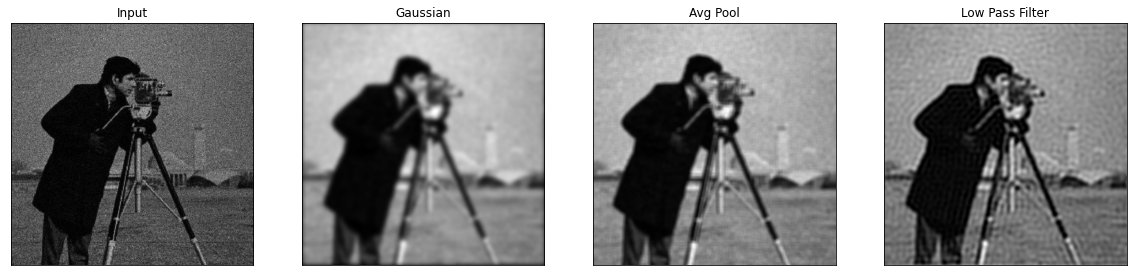

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw


img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)



# TODO
gaussian_img = GaussianBlurImage(img, 5)
avg_pool_img = average_pooling(get_pools(img, pool_size=10, stride=1))
filtered_image = low_pass_img(img)

plt.figure(figsize=(20, 5))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	Question 3
        </font>
		<p></p>
		<hr>
Take the 3.jpg image from the input and apply HSV and YCbCr transformations on the images and display them in the output.	   <br>
	</font>
</div>

<div style="direction:ltr;line-height:300%;">
	<font face="XB Zar" size=4>
        Here is a function to convert rgb to ycbcr, which is obtained simply by multiplying it by its conversion matrix and creating the width from the origin in each photo channel, and for HSV, the function is also used in openCV.
</font> 
</div>

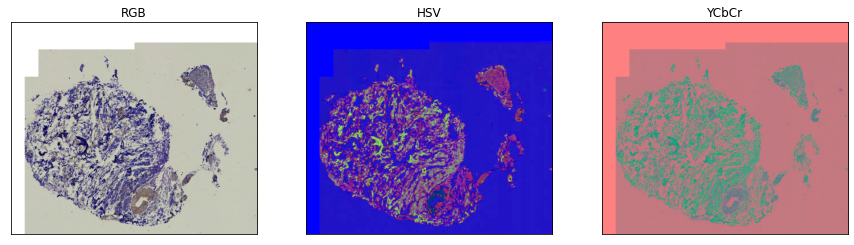

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.cvtColor(cv2.imread('3.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

# TODO

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)


hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr_img = rgb2ycbcr(img)


plt.figure(figsize=(15, 5))  

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	Question 4
        </font>
		<p></p>
		<hr>
       3.jpg from the input and remove the background of the image after removing the salt and pepper noises from the image. (Note that the background includes white parts and cream parts.)
	   <br>
	</font>
</div>

<div style="direction:ltr;line-height:300%;">
	<font face="XB Zar" size=4>
        At first, we use median filter to remove salt pepper noise and remove its noise. In the next step, we use this method to remove the background, which takes the photo to the grayscale space and in that space, we find the image without the background by using the binary threshold and finding the mask for the foreground and background. To do this, we first take the photo to grayscale and apply a truncated thresholding to the average size of the numbers in the image, assuming that the numbers above this limit are in the foreground. In the next step, we find the foreground and background mask, and by adding the image to itself using this mask, only the foreground part will remain.
    </font> 
</div>

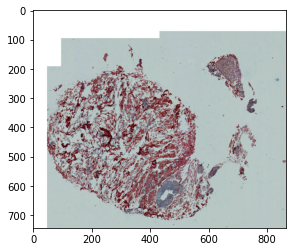

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('3.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)

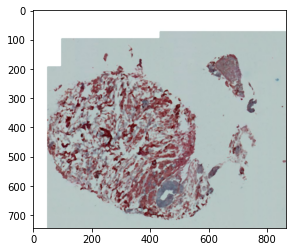

In [10]:
denoised_img = cv2.medianBlur(img, 5)
plt.imshow(denoised_img)

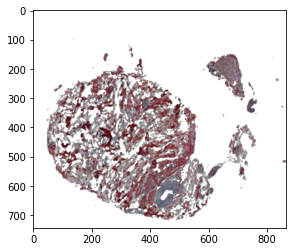

In [11]:
def bgremove2(myimage):
    # First Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
    threshold = int(np.mean(myimage_grey))
    ret,baseline = cv2.threshold(myimage_grey,threshold,255,cv2.THRESH_TRUNC)
 
    ret,background = cv2.threshold(baseline,threshold - 1,255,cv2.THRESH_BINARY)
 
    ret,foreground = cv2.threshold(baseline,threshold - 1,255,cv2.THRESH_BINARY_INV)
 
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
    return finalimage

rm_bg_img = bgremove2(denoised_img)

plt.imshow(rm_bg_img)